In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

# Parameters
initial_salary = 70000
hike_rate = 0.035
self_contribution_rate = 0.03
years = 35
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025

# NZ tax brackets
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "weight": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "weight": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "weight": 0.3},
}

# Tax calculation function
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [
        (bracket[0] * ((1 + inflation_rate) ** (year - 1)),
         bracket[1] * ((1 + inflation_rate) ** (year - 1)), rate)
        for (bracket, rate) in zip(base_slabs, tax_rates)
    ]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# Run simulation
np.random.seed(42)
records = []
salary = initial_salary
corpus = 0

for year in range(1, years + 1):
    age = start_age + year - 1

    # --- Salary growth ---
    if year > 1:
        salary *= (1 + np.random.normal(loc=hike_rate, scale=0.01))

    # --- Deductions ---
    tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
    acc = acc_levy * salary
    net_salary = salary - tax - acc

    # --- Contributions ---
    emp_contribution = self_contribution_rate * net_salary
    employer_contribution = 0.03 * net_salary
    total_contribution = emp_contribution + employer_contribution

    # --- Apply growth to existing corpus ---
    weighted_return = 0
    fund_growth = {}
    for name, fund in funds.items():
        annual_return = np.random.normal(fund["growth_rate"], fund["volatility"])
        fund_growth[f"{name} Return"] = annual_return
        weighted_return += fund["weight"] * annual_return

    corpus = corpus * (1 + weighted_return) + total_contribution

    # --- Calculate fund-wise allocation of current year's contribution ---
    fund_values = {
        name + " Value": total_contribution * (1 + fund_growth[name + " Return"]) * fund["weight"]
        for name, fund in funds.items()
    }

    record = {
        "Year": year,
        "Age": age,
        "Gross Salary": round(salary, 2),
        "Income Tax": round(tax, 2),
        "ACC Levy": round(acc, 2),
        "Net Salary": round(net_salary, 2),
        "Employee Contribution": round(emp_contribution, 2),
        "Employer Contribution": round(employer_contribution, 2),
        "Total Contribution": round(total_contribution, 2),
        "Harboursafe Return": round(fund_values["Harboursafe Value"], 2),
        "Horizon Return": round(fund_values["Horizon Value"], 2),
        "SkyHigh Return": round(fund_values["SkyHigh Value"], 2),
        "Total Fund Value": round(corpus, 2)
    }

    records.append(record)

# Build DataFrame
df_detailed = pd.DataFrame(records)

cumulative_data = df_detailed[[
    "Gross Salary", "Income Tax", "ACC Levy", "Net Salary",
    "Employee Contribution", "Employer Contribution", "Total Contribution",
    "Harboursafe Return", "Horizon Return", "SkyHigh Return"
]].sum()

# Get final fund value only from last row
cumulative_data["Total Fund Value"] = df_detailed["Total Fund Value"].iloc[-1]

cumulative_summary_df = pd.DataFrame([cumulative_data.round(2)])
cumulative_summary_df.insert(0, "Year", "Total")
cumulative_summary_df.insert(1, "Age", "N/A")


# Every 5-year snapshot
summary_every_5_years = df_detailed[df_detailed["Year"] % 5 == 0]

# Display nicely (in Jupyter or IPython)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("🔹 Detailed Yearly Summary:")
display(df_detailed)

print("\n🔹 Cumulative Summary:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Summary:")
display(summary_every_5_years)

#Saving files to Local System in Excel FIle
save_path = r"C:\Users\bhara\OneDrive - The University of Auckland\Quarter - 2 (BUSINFO700 - BUSINFO705)\BUSINFO705\Project\Colab_Notebook\CSV Files\Task 1 - No change in fund allocation.xlsx"

df_detailed.to_excel(save_path, index=False)
print("df_details Saved to local machine")


🔹 Detailed Yearly Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
0,1,30,"70,000.00","13,220.03","1,169.00","55,610.97","1,668.33","1,668.33","3,336.66","1,417.86","1,051.53","1,238.13","3,336.66"
1,2,31,"73,516.12","14,080.36","1,227.72","58,208.04","1,746.24","1,746.24","3,492.48","1,433.02","1,090.09","1,498.47","7,334.64"
2,3,32,"76,653.37","14,822.18","1,280.11","60,551.09","1,816.53","1,816.53","3,633.07","1,473.61","1,222.86","1,096.83","11,291.18"
3,4,33,"78,979.24","15,315.59","1,318.95","62,344.70","1,870.34","1,870.34","3,740.68","1,570.49",969.70,835.57,"13,930.35"
4,5,34,"81,299.43","15,802.19","1,357.70","64,139.54","1,924.19","1,924.19","3,848.37","1,519.12","1,267.65","1,055.32","17,755.99"
5,6,35,"82,996.71","16,096.69","1,386.05","65,513.98","1,965.42","1,965.42","3,930.84","1,746.52","1,227.95","1,316.65","23,314.24"
6,7,36,"84,719.10","16,393.35","1,414.81","66,910.95","2,007.33","2,007.33","4,014.66","1,622.37","1,296.71","1,040.20","27,007.33"
7,8,37,"88,002.56","17,152.82","1,469.64","69,380.09","2,081.40","2,081.40","4,162.81","1,677.56","1,291.77","1,220.92","31,348.18"
8,9,38,"92,712.70","18,334.67","1,548.30","72,829.73","2,184.89","2,184.89","4,369.78","1,812.28","1,250.55","1,669.05","38,315.65"
9,10,39,"94,825.77","18,731.61","1,583.59","74,510.57","2,235.32","2,235.32","4,470.63","1,873.99","1,152.40","1,109.03","39,913.31"



🔹 Cumulative Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
0,Total,N/A,"4,704,736.43","998,130.20","78,569.07","3,628,037.13","108,841.14","108,841.14","217,682.24","89,624.30","69,581.50","70,719.70","536,477.18"



🔹 Every 5-Year Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
4,5,34,"81,299.43","15,802.19","1,357.70","64,139.54","1,924.19","1,924.19","3,848.37","1,519.12","1,267.65","1,055.32","17,755.99"
9,10,39,"94,825.77","18,731.61","1,583.59","74,510.57","2,235.32","2,235.32","4,470.63","1,873.99","1,152.40","1,109.03","39,913.31"
14,15,44,"114,254.35","23,399.97","1,908.05","88,946.33","2,668.39","2,668.39","5,336.78","2,125.19","1,653.12","1,875.19","81,194.12"
19,20,49,"139,840.26","29,963.66","2,335.33","107,541.26","3,226.24","3,226.24","6,452.48","2,689.01","2,000.79","2,171.01","128,867.59"
24,25,54,"161,797.09","35,082.75","2,702.01","124,012.32","3,720.37","3,720.37","7,440.74","3,131.97","2,438.50","2,463.39","232,717.85"
29,30,59,"191,069.60","42,336.56","3,190.86","145,542.17","4,366.27","4,366.27","8,732.53","3,617.94","2,468.57","3,509.52","376,411.59"
34,35,64,"227,758.66","51,721.65","3,803.57","172,233.44","5,167.00","5,167.00","10,334.01","4,126.73","3,196.88","3,941.30","536,477.18"


df_details Saved to local machine


In [2]:
import numpy as np
import pandas as pd

# Parameters
initial_salary = 70000
hike_rate = 0.035
self_contribution_rate = 0.03
years = 35
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025
num_simulations = 5000

# NZ tax brackets
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "weight": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "weight": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "weight": 0.3},
}

# Tax function
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [
        (bracket[0] * ((1 + inflation_rate) ** (year - 1)),
         bracket[1] * ((1 + inflation_rate) ** (year - 1)), rate)
        for (bracket, rate) in zip(base_slabs, tax_rates)
    ]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# Use average Monte Carlo returns for main run
np.random.seed(42)
fund_returns_simulated = {name: [] for name in funds}

for name, fund in funds.items():
    returns = [np.random.normal(fund["growth_rate"], fund["volatility"], num_simulations) for _ in range(years)]
    fund_returns_simulated[name] = np.mean(returns, axis=1)

# Main simulation (single run for reporting)
salary = initial_salary
corpus = 0
records = []

for year in range(1, years + 1):
    age = start_age + year - 1
    if year > 1:
        salary *= (1 + np.random.normal(loc=hike_rate, scale=0.01))

    tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
    acc = acc_levy * salary
    net_salary = salary - tax - acc

    emp_contribution = self_contribution_rate * net_salary
    employer_contribution = 0.03 * net_salary
    total_contribution = emp_contribution + employer_contribution

    harboursafe_return = total_contribution * (1 + fund_returns_simulated["Harboursafe"][year - 1]) * funds["Harboursafe"]["weight"]
    horizon_return = total_contribution * (1 + fund_returns_simulated["Horizon"][year - 1]) * funds["Horizon"]["weight"]
    skyhigh_return = total_contribution * (1 + fund_returns_simulated["SkyHigh"][year - 1]) * funds["SkyHigh"]["weight"]

    total_growth = (
        corpus * (
            fund_returns_simulated["Harboursafe"][year - 1] * funds["Harboursafe"]["weight"] +
            fund_returns_simulated["Horizon"][year - 1] * funds["Horizon"]["weight"] +
            fund_returns_simulated["SkyHigh"][year - 1] * funds["SkyHigh"]["weight"]
        )
    )

    corpus = corpus + total_growth + total_contribution

    records.append({
        "Year": year,
        "Age": age,
        "Gross Salary": round(salary, 2),
        "Income Tax": round(tax, 2),
        "ACC Levy": round(acc, 2),
        "Net Salary": round(net_salary, 2),
        "Employee Contribution": round(emp_contribution, 2),
        "Employer Contribution": round(employer_contribution, 2),
        "Total Contribution": round(total_contribution, 2),
        "Harboursafe Return": round(harboursafe_return, 2),
        "Horizon Return": round(horizon_return, 2),
        "SkyHigh Return": round(skyhigh_return, 2),
        "Total Fund Value": round(corpus, 2)
    })

df_detailed = pd.DataFrame(records)

# Monte Carlo percentiles for final year
all_simulations = []
for sim in range(num_simulations):
    salary = initial_salary
    corpus = 0
    for year in range(1, years + 1):
        if year > 1:
            salary *= (1 + np.random.normal(loc=hike_rate, scale=0.01))
        tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
        acc = acc_levy * salary
        net_salary = salary - tax - acc
        emp_contribution = self_contribution_rate * net_salary
        employer_contribution = 0.03 * net_salary
        total_contribution = emp_contribution + employer_contribution
        weighted_return = sum([
            fund["weight"] * np.random.normal(fund["growth_rate"], fund["volatility"])
            for fund in funds.values()
        ])
        corpus = corpus * (1 + weighted_return) + total_contribution
    all_simulations.append(corpus)

final_corpus_percentiles = np.percentile(all_simulations, [5, 25, 50, 75, 95])
cumulative_summary_df = pd.DataFrame([{
    "Year": "Total",
    "Age": "N/A",
    "5th Percentile": round(final_corpus_percentiles[0], 2),
    "25th Percentile": round(final_corpus_percentiles[1], 2),
    "50th Percentile (Median)": round(final_corpus_percentiles[2], 2),
    "75th Percentile": round(final_corpus_percentiles[3], 2),
    "95th Percentile": round(final_corpus_percentiles[4], 2),
}])

# Every 5-Year Summary
summary_every_5_years = df_detailed[df_detailed["Year"] % 5 == 0]

# Show dataframes
from IPython.display import display
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("🔹 Detailed Yearly Summary:")
display(df_detailed)

print("\n🔹 Monte Carlo Cumulative Summary:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Summary:")
display(summary_every_5_years)


#Saving files to Local System in Excel FIle
save_path = r"C:\Users\bhara\OneDrive - The University of Auckland\Quarter - 2 (BUSINFO700 - BUSINFO705)\BUSINFO705\Project\Colab_Notebook\CSV Files\Task 1 - No change in fund allocation with Monte.xlsx"

df_detailed.to_excel(save_path, index=False)
print("df_details Saved to local machine")


🔹 Detailed Yearly Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
0,1,30,"70,000.00","13,220.03","1,169.00","55,610.97","1,668.33","1,668.33","3,336.66","1,385.09","1,067.93","1,105.79","3,336.66"
1,2,31,"72,539.19","13,787.28","1,211.40","57,540.50","1,726.22","1,726.22","3,452.43","1,432.08","1,101.09","1,143.10","7,005.41"
2,3,32,"74,733.97","14,246.35","1,248.06","59,239.56","1,777.19","1,777.19","3,554.37","1,475.82","1,133.17","1,180.37","11,022.93"
3,4,33,"77,383.06","14,836.74","1,292.30","61,254.03","1,837.62","1,837.62","3,675.24","1,526.44","1,175.82","1,216.84","15,429.58"
4,5,34,"79,451.07","15,247.69","1,326.83","62,876.56","1,886.30","1,886.30","3,772.59","1,564.24","1,204.95","1,248.26","20,203.60"
5,6,35,"82,527.39","15,955.89","1,378.21","65,193.29","1,955.80","1,955.80","3,911.60","1,622.80","1,247.71","1,301.06","25,457.93"
6,7,36,"83,854.76","16,134.04","1,400.37","66,320.34","1,989.61","1,989.61","3,979.22","1,650.51","1,270.37","1,316.69","31,089.95"
7,8,37,"86,614.70","16,736.47","1,446.47","68,431.77","2,052.95","2,052.95","4,105.91","1,703.60","1,311.49","1,360.28","37,236.25"
8,9,38,"90,748.06","17,745.27","1,515.49","71,487.29","2,144.62","2,144.62","4,289.24","1,781.58","1,370.75","1,418.23","43,967.65"
9,10,39,"94,961.75","18,772.40","1,585.86","74,603.49","2,238.10","2,238.10","4,476.21","1,857.19","1,432.45","1,475.43","51,281.18"



🔹 Monte Carlo Cumulative Summary:


,Year,Age,5th Percentile,25th Percentile,50th Percentile (Median),75th Percentile,95th Percentile
0,Total,N/A,"396,063.75","508,210.50","606,295.12","721,212.26","943,584.63"



🔹 Every 5-Year Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
4,5,34,"79,451.07","15,247.69","1,326.83","62,876.56","1,886.30","1,886.30","3,772.59","1,564.24","1,204.95","1,248.26","20,203.60"
9,10,39,"94,961.75","18,772.40","1,585.86","74,603.49","2,238.10","2,238.10","4,476.21","1,857.19","1,432.45","1,475.43","51,281.18"
14,15,44,"108,419.40","21,532.92","1,810.60","85,075.88","2,552.28","2,552.28","5,104.55","2,117.93","1,628.52","1,692.85","97,660.15"
19,20,49,"129,903.67","26,684.59","2,169.39","101,049.69","3,031.49","3,031.49","6,062.98","2,514.11","1,938.05","1,994.75","165,806.55"
24,25,54,"151,108.00","31,555.36","2,523.50","117,029.14","3,510.87","3,510.87","7,021.75","2,911.17","2,242.81","2,313.78","264,282.35"
29,30,59,"185,225.79","40,408.10","3,093.27","141,724.41","4,251.73","4,251.73","8,503.46","3,531.56","2,724.17","2,813.15","406,414.93"
34,35,64,"213,200.92","46,917.59","3,560.46","162,722.87","4,881.69","4,881.69","9,763.37","4,053.07","3,121.00","3,221.49","608,399.23"


df_details Saved to local machine


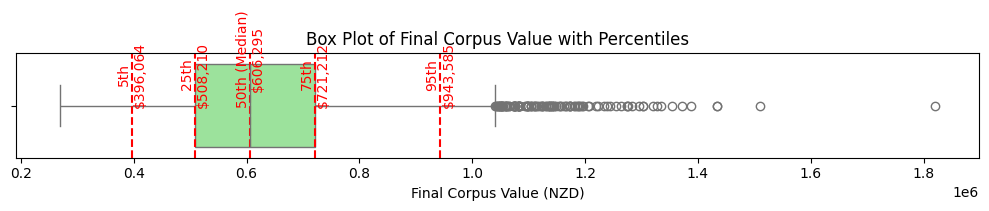

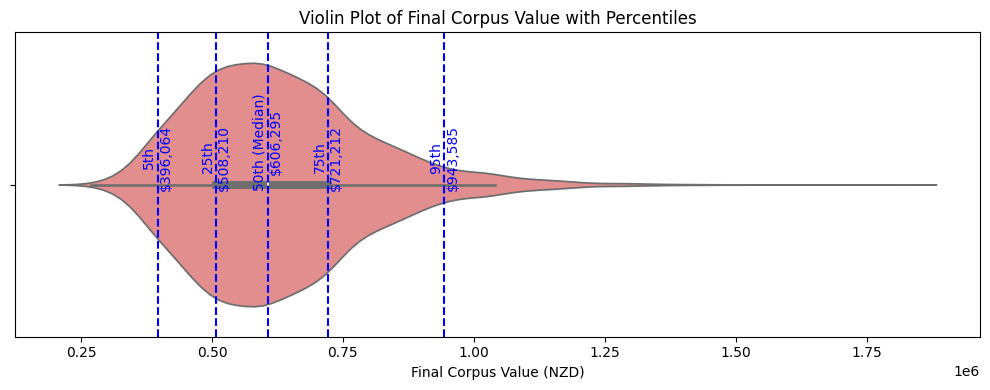

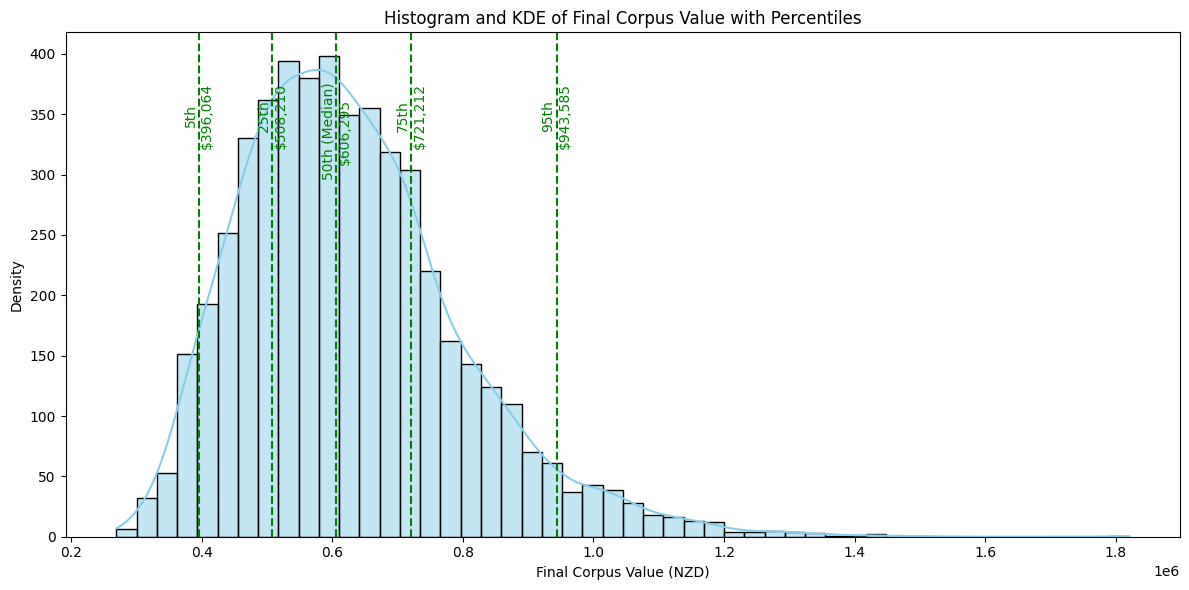

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming all_simulations is your list of final corpus values
# Calculate percentiles
percentiles = np.percentile(all_simulations, [5, 25, 50, 75, 95])
percentile_labels = ['5th', '25th', '50th (Median)', '75th', '95th']

# Create box plot
plt.figure(figsize=(10, 2))
ax = sns.boxplot(x=all_simulations, color='lightgreen')

# Annotate percentiles
for perc, label in zip(percentiles, percentile_labels):
    plt.axvline(x=perc, color='red', linestyle='--')
    plt.text(perc, 0.02, f'{label}\n${perc:,.0f}', rotation=90,
             verticalalignment='bottom', horizontalalignment='center', color='red')

plt.title('Box Plot of Final Corpus Value with Percentiles')
plt.xlabel('Final Corpus Value (NZD)')
plt.tight_layout()
plt.show()


# Create violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(x=all_simulations, color='lightcoral')

# Annotate percentiles
for perc, label in zip(percentiles, percentile_labels):
    plt.axvline(x=perc, color='blue', linestyle='--')
    plt.text(perc, 0.02, f'{label}\n${perc:,.0f}', rotation=90,
             verticalalignment='bottom', horizontalalignment='center', color='blue')

plt.title('Violin Plot of Final Corpus Value with Percentiles')
plt.xlabel('Final Corpus Value (NZD)')
plt.tight_layout()
plt.show()


# Create histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(all_simulations, bins=50, kde=True, color='skyblue', edgecolor='black')

# Annotate percentiles
for perc, label in zip(percentiles, percentile_labels):
    plt.axvline(x=perc, color='green', linestyle='--')
    plt.text(perc, plt.ylim()[1]*0.9, f'{label}\n${perc:,.0f}', rotation=90,
             verticalalignment='top', horizontalalignment='center', color='green')

plt.title('Histogram and KDE of Final Corpus Value with Percentiles')
plt.xlabel('Final Corpus Value (NZD)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [4]:


# Parameters
initial_salary = 70000
hike_rate = 0.035
self_contribution_rate = 0.03
years = 35
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025
num_simulations = 5000

# NZ tax brackets
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075},
}

# Tax function
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [
        (bracket[0] * ((1 + inflation_rate) ** (year - 1)),
         bracket[1] * ((1 + inflation_rate) ** (year - 1)), rate)
        for (bracket, rate) in zip(base_slabs, tax_rates)
    ]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# Dynamic asset allocation
def get_weights(year):
    if year <= 10:
        return {"Harboursafe": 0.1, "Horizon": 0.1, "SkyHigh": 0.8}
    elif year <= 20:
        return {"Harboursafe": 0.2, "Horizon": 0.3, "SkyHigh": 0.5}
    elif year <= 30:
        return {"Harboursafe": 0.3, "Horizon": 0.4, "SkyHigh": 0.3}
    else:
        return {"Harboursafe": 0.5, "Horizon": 0.4, "SkyHigh": 0.1}

# Generate average returns per fund per year using Monte Carlo
np.random.seed(42)
fund_returns_simulated = {name: [] for name in funds}
for name, fund in funds.items():
    returns = [np.random.normal(fund["growth_rate"], fund["volatility"], num_simulations) for _ in range(years)]
    fund_returns_simulated[name] = np.mean(returns, axis=1)

# Main simulation
salary = initial_salary
corpus = 0
records = []

for year in range(1, years + 1):
    age = start_age + year - 1
    weights = get_weights(year)

    if year > 1:
        salary *= (1 + np.random.normal(loc=hike_rate, scale=0.01))

    tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
    acc = acc_levy * salary
    net_salary = salary - tax - acc

    emp_contribution = self_contribution_rate * net_salary
    employer_contribution = 0.03 * net_salary
    total_contribution = emp_contribution + employer_contribution

    harboursafe_return = total_contribution * (1 + fund_returns_simulated["Harboursafe"][year - 1]) * weights["Harboursafe"]
    horizon_return = total_contribution * (1 + fund_returns_simulated["Horizon"][year - 1]) * weights["Horizon"]
    skyhigh_return = total_contribution * (1 + fund_returns_simulated["SkyHigh"][year - 1]) * weights["SkyHigh"]

    total_growth = corpus * (
        fund_returns_simulated["Harboursafe"][year - 1] * weights["Harboursafe"] +
        fund_returns_simulated["Horizon"][year - 1] * weights["Horizon"] +
        fund_returns_simulated["SkyHigh"][year - 1] * weights["SkyHigh"]
    )

    corpus = corpus + total_growth + total_contribution

    records.append({
        "Year": year,
        "Age": age,
        "Gross Salary": round(salary, 2),
        "Income Tax": round(tax, 2),
        "ACC Levy": round(acc, 2),
        "Net Salary": round(net_salary, 2),
        "Employee Contribution": round(emp_contribution, 2),
        "Employer Contribution": round(employer_contribution, 2),
        "Total Contribution": round(total_contribution, 2),
        "Harboursafe Return": round(harboursafe_return, 2),
        "Horizon Return": round(horizon_return, 2),
        "SkyHigh Return": round(skyhigh_return, 2),
        "Total Fund Value": round(corpus, 2)
    })

df_detailed = pd.DataFrame(records)

# Monte Carlo simulation to get corpus percentiles
all_simulations = []
for sim in range(num_simulations):
    salary = initial_salary
    corpus = 0
    for year in range(1, years + 1):
        weights = get_weights(year)
        if year > 1:
            salary *= (1 + np.random.normal(loc=hike_rate, scale=0.01))
        tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
        acc = acc_levy * salary
        net_salary = salary - tax - acc
        emp_contribution = self_contribution_rate * net_salary
        employer_contribution = 0.03 * net_salary
        total_contribution = emp_contribution + employer_contribution
        weighted_return = sum([
            weights[name] * np.random.normal(funds[name]["growth_rate"], funds[name]["volatility"])
            for name in funds
        ])
        corpus = corpus * (1 + weighted_return) + total_contribution
    all_simulations.append(corpus)

# Create cumulative summary from Monte Carlo
final_corpus_percentiles = np.percentile(all_simulations, [5, 25, 50, 75, 95])
cumulative_summary_df = pd.DataFrame([{
    "Year": "Total",
    "Age": "N/A",
    "5th Percentile": round(final_corpus_percentiles[0], 2),
    "25th Percentile": round(final_corpus_percentiles[1], 2),
    "50th Percentile (Median)": round(final_corpus_percentiles[2], 2),
    "75th Percentile": round(final_corpus_percentiles[3], 2),
    "95th Percentile": round(final_corpus_percentiles[4], 2),
}])

# Every 5-Year Snapshot
summary_every_5_years = df_detailed[df_detailed["Year"] % 5 == 0]

# Display output
from IPython.display import display
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("🔹 Detailed Yearly Summary:")
display(df_detailed)

print("\n🔹 Monte Carlo Cumulative Summary:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Summary:")
display(summary_every_5_years)


🔹 Detailed Yearly Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
0,1,30,"70,000.00","13,220.03","1,169.00","55,610.97","1,668.33","1,668.33","3,336.66",346.27,355.98,"2,948.76","3,336.66"
1,2,31,"72,539.19","13,787.28","1,211.40","57,540.50","1,726.22","1,726.22","3,452.43",358.02,367.03,"3,048.26","7,099.20"
2,3,32,"74,733.97","14,246.35","1,248.06","59,239.56","1,777.19","1,777.19","3,554.37",368.95,377.72,"3,147.66","11,332.58"
3,4,33,"77,383.06","14,836.74","1,292.30","61,254.03","1,837.62","1,837.62","3,675.24",381.61,391.94,"3,244.92","16,066.16"
4,5,34,"79,451.07","15,247.69","1,326.83","62,876.56","1,886.30","1,886.30","3,772.59",391.06,401.65,"3,328.69","21,324.19"
5,6,35,"82,527.39","15,955.89","1,378.21","65,193.29","1,955.80","1,955.80","3,911.60",405.70,415.90,"3,469.48","27,304.57"
6,7,36,"83,854.76","16,134.04","1,400.37","66,320.34","1,989.61","1,989.61","3,979.22",412.63,423.46,"3,511.16","33,809.11"
7,8,37,"86,614.70","16,736.47","1,446.47","68,431.77","2,052.95","2,052.95","4,105.91",425.90,437.16,"3,627.42","41,081.70"
8,9,38,"90,748.06","17,745.27","1,515.49","71,487.29","2,144.62","2,144.62","4,289.24",445.39,456.92,"3,781.93","49,154.26"
9,10,39,"94,961.75","18,772.40","1,585.86","74,603.49","2,238.10","2,238.10","4,476.21",464.30,477.48,"3,934.48","58,023.51"



🔹 Monte Carlo Cumulative Summary:


,Year,Age,5th Percentile,25th Percentile,50th Percentile (Median),75th Percentile,95th Percentile
0,Total,N/A,"399,107.69","531,553.30","654,821.32","803,089.45","1,104,167.43"



🔹 Every 5-Year Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Total Fund Value
4,5,34,"79,451.07","15,247.69","1,326.83","62,876.56","1,886.30","1,886.30","3,772.59",391.06,401.65,"3,328.69","21,324.19"
9,10,39,"94,961.75","18,772.40","1,585.86","74,603.49","2,238.10","2,238.10","4,476.21",464.30,477.48,"3,934.48","58,023.51"
14,15,44,"108,419.40","21,532.92","1,810.60","85,075.88","2,552.28","2,552.28","5,104.55","1,058.96","1,628.52","2,821.42","112,469.56"
19,20,49,"129,903.67","26,684.59","2,169.39","101,049.69","3,031.49","3,031.49","6,062.98","1,257.06","1,938.05","3,324.59","196,306.41"
24,25,54,"151,108.00","31,555.36","2,523.50","117,029.14","3,510.87","3,510.87","7,021.75","2,183.38","2,990.42","2,313.78","309,715.58"
29,30,59,"185,225.79","40,408.10","3,093.27","141,724.41","4,251.73","4,251.73","8,503.46","2,648.67","3,632.23","2,813.15","474,176.58"
34,35,64,"213,200.92","46,917.59","3,560.46","162,722.87","4,881.69","4,881.69","9,763.37","5,066.33","4,161.33","1,073.83","669,930.90"


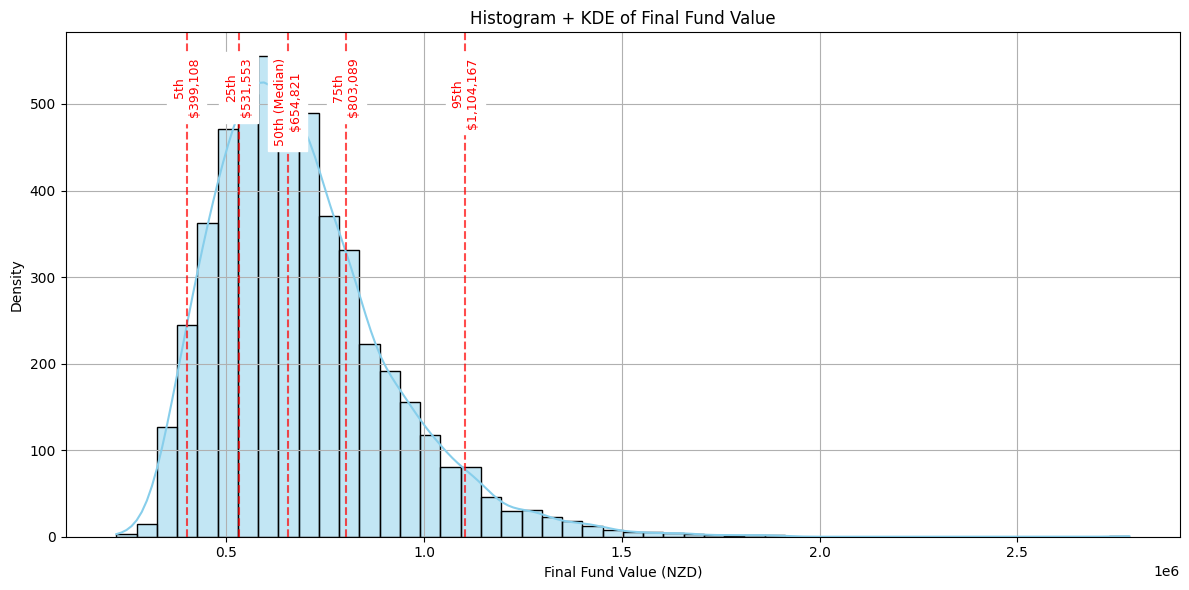

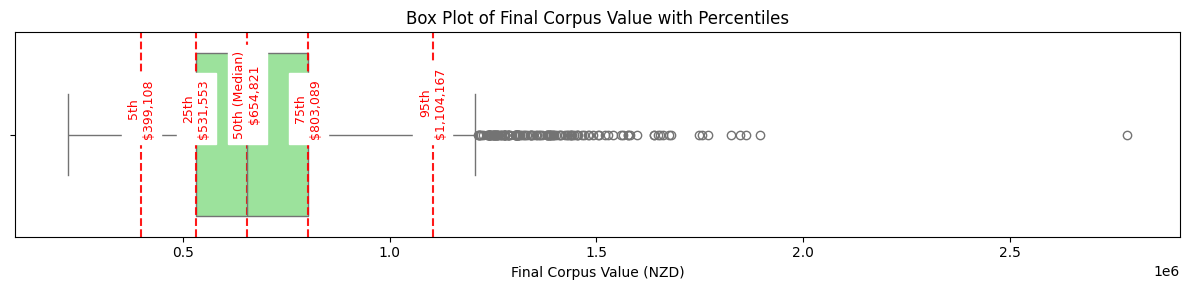

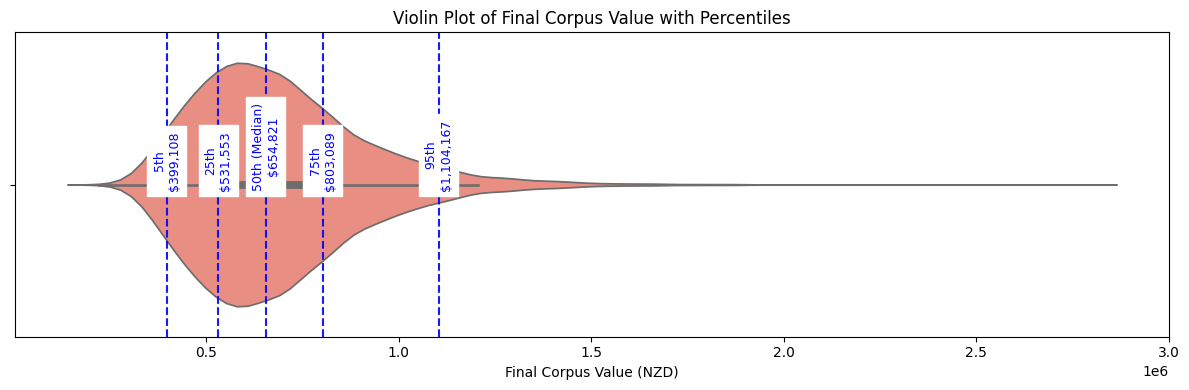

In [5]:

# Ensure percentiles are calculated
percentiles = [5, 25, 50, 75, 95]
percentile_values = np.percentile(all_simulations, percentiles)
percentile_labels = ['5th', '25th', '50th (Median)', '75th', '95th']

# 📊 1. Histogram + KDE with percentile lines
plt.figure(figsize=(12, 6))
sns.histplot(all_simulations, bins=50, kde=True, color='skyblue', edgecolor='black')

for val, label in zip(percentile_values, percentile_labels):
    plt.axvline(x=val, color='red', linestyle='--', alpha=0.7)
    plt.text(val, plt.ylim()[1]*0.95, f"{label}\n${val:,.0f}", color='red',
             rotation=90, ha='center', va='top', fontsize=9, backgroundcolor='white')

plt.title("Histogram + KDE of Final Fund Value")
plt.xlabel("Final Fund Value (NZD)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📦 2. Box Plot with percentile lines and data labels
plt.figure(figsize=(12, 3))
sns.boxplot(x=all_simulations, color='lightgreen')
for val, label in zip(percentile_values, percentile_labels):
    plt.axvline(x=val, color='red', linestyle='--', alpha=0.9)
    plt.text(val, 0.02, f"{label}\n${val:,.0f}", color='red',
             rotation=90, ha='center', va='bottom', fontsize=9, backgroundcolor='white')
plt.title("Box Plot of Final Corpus Value with Percentiles")
plt.xlabel("Final Corpus Value (NZD)")
plt.tight_layout()
plt.show()

# 🎻 3. Violin Plot with percentile lines and data labels
plt.figure(figsize=(12, 4))
sns.violinplot(x=all_simulations, color='salmon', inner='box')
for val, label in zip(percentile_values, percentile_labels):
    plt.axvline(x=val, color='blue', linestyle='--', alpha=0.9)
    plt.text(val, 0.02, f"{label}\n${val:,.0f}", color='blue',
             rotation=90, ha='center', va='bottom', fontsize=9, backgroundcolor='white')
plt.title("Violin Plot of Final Corpus Value with Percentiles")
plt.xlabel("Final Corpus Value (NZD)")
plt.tight_layout()
plt.show()


✅ Simulates Emily’s retirement savings with tax and ACC
✅ Grows contributions over time
✅ Includes lump sum additions
✅ Allocates dynamically across multiple asset classes
✅ Simulates 10,000 Monte Carlo runs
✅ Models a 25-year post-retirement withdrawal phase
✅ Plots: Histogram, Box Plot, Violin Plot with percentile labels

In [6]:
import numpy as np
import pandas as pd

# PARAMETERS
initial_salary = 70000
hike_rate_mean = 0.05
hike_rate_std = 0.007
contribution_start = 0.06
contribution_increase_years = 3
contribution_increase_amount = 0.01
contribution_max = 0.20
lump_sum_amount = 10000
lump_sum_frequency = 5
start_lump_sum_year = 5
years = 35
simulations = 10000
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025

# TAX BRACKETS
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# FUND PARAMETERS
growth_rates = {
    "Harboursafe": {"mean": 0.04, "std": 0.05},
    "Horizon": {"mean": 0.07, "std": 0.105},
    "SkyHigh": {"mean": 0.105, "std": 0.20},
    "Foreign_Equities": {"mean": 0.15, "std": np.sqrt(0.15**2 + 0.02**2)},
    "Bitcoin": {"mean": 0.15, "std": 0.60},
}

def get_allocation(year):
    if year <= 7:
        return {"Harboursafe": 0.05, "Horizon": 0.10, "SkyHigh": 0.65, "Foreign_Equities": 0.15, "Bitcoin": 0.05}
    elif year <= 10:
        return {"Harboursafe": 0.10, "Horizon": 0.15, "SkyHigh": 0.60, "Foreign_Equities": 0.15}
    elif year <= 15:
        return {"Harboursafe": 0.15, "Horizon": 0.20, "SkyHigh": 0.50, "Foreign_Equities": 0.15}
    elif year <= 20:
        return {"Harboursafe": 0.20, "Horizon": 0.25, "SkyHigh": 0.50, "Foreign_Equities": 0.05}
    elif year <= 25:
        return {"Harboursafe": 0.30, "Horizon": 0.30, "SkyHigh": 0.30, "Foreign_Equities": 0.10}
    elif year <= 30:
        return {"Harboursafe": 0.40, "Horizon": 0.35, "SkyHigh": 0.25}
    else:
        return {"Harboursafe": 0.60, "Horizon": 0.20, "SkyHigh": 0.20}

def calculate_tax(salary, brackets, year, inflation=0.025):
    adjusted = [(b[0]*(1+inflation)**(year-1), b[1]*(1+inflation)**(year-1), r)
                for b, r in zip(brackets, tax_rates)]
    tax = 0
    for low, high, rate in adjusted:
        if salary > low:
            taxable = min(salary, high) - low
            tax += taxable * rate
        else:
            break
    return tax

# === DETAILED YEARLY SIMULATION ===
records = []
salary = initial_salary
corpus = 0

for year in range(1, years + 1):
    age = start_age + year - 1
    tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
    acc = acc_levy * salary
    net_salary = salary - tax - acc

    rate = min(contribution_start + ((year - 1) // contribution_increase_years) * contribution_increase_amount, contribution_max)
    emp_contrib = net_salary * rate
    employer_contrib = min(0.03, rate) * net_salary
    total_contrib = emp_contrib + employer_contrib

    if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
        total_contrib += lump_sum_amount

    allocation = get_allocation(year)
    total_growth = 0
    fund_returns = {}
    fund_contributions = {}

    for fund, weight in allocation.items():
        g = np.random.normal(growth_rates[fund]["mean"], growth_rates[fund]["std"])
        if fund == "Foreign_Equities":
            base_g = np.random.normal(0.12, 0.15)
            currency_g = np.random.normal(0.03, 0.02)
            g = (1 + base_g) * (1 + currency_g) - 1

        contrib_val = total_contrib * weight
        fund_contributions[f"{fund} Contribution"] = round(contrib_val, 2)

        r = corpus * weight * g + contrib_val * 0.5
        total_growth += r
        fund_returns[f"{fund} Return"] = round(r, 2)

    corpus += total_contrib + total_growth

    records.append({
        "Year": year, "Age": age,
        "Gross Salary": round(salary, 2),
        "Income Tax": round(tax, 2),
        "ACC Levy": round(acc, 2),
        "Net Salary": round(net_salary, 2),
        "Employee Contribution": round(emp_contrib, 2),
        "Employer Contribution": round(employer_contrib, 2),
        "Total Contribution": round(total_contrib, 2),
        **fund_contributions,
        **fund_returns,
        "Total Fund Value": round(corpus, 2)
    })

    salary *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))

df_detailed = pd.DataFrame(records)

# === MONTE CARLO FINAL CORPUS ===
final_values = []
for _ in range(simulations):
    salary = initial_salary
    corpus = 0
    for year in range(1, years + 1):
        tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
        acc = acc_levy * salary
        net_salary = salary - tax - acc
        rate = min(contribution_start + ((year - 1) // contribution_increase_years) * contribution_increase_amount, contribution_max)
        total_contrib = net_salary * rate + 0.03 * net_salary
        if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
            total_contrib += lump_sum_amount
        weights = get_allocation(year)
        weighted_return = sum([
            np.random.normal(growth_rates[fund]["mean"], growth_rates[fund]["std"]) * weight
            for fund, weight in weights.items()
        ])
        corpus = corpus * (1 + weighted_return) + total_contrib
        salary *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))
    final_values.append(corpus)

# === SUMMARY TABLES ===
final_array = np.array(final_values)
summary_df = pd.DataFrame([{
    "Year": "Total", "Age": "N/A",
    "5th Percentile": np.percentile(final_array, 5),
    "25th Percentile": np.percentile(final_array, 25),
    "50th Percentile (Median)": np.percentile(final_array, 50),
    "75th Percentile": np.percentile(final_array, 75),
    "95th Percentile": np.percentile(final_array, 95),
}])

summary_every_5_years = df_detailed[df_detailed["Year"] % 5 == 0]

# === DISPLAY RESULTS AS DATAFRAMES ===
from IPython.display import display
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("🔹 Detailed Yearly Summary:")
display(df_detailed)

print("\n🔹 Monte Carlo Cumulative Summary:")
display(summary_df)

print("\n🔹 Every 5-Year Summary:")
display(summary_every_5_years)


🔹 Detailed Yearly Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Contribution,Horizon Contribution,SkyHigh Contribution,Foreign_Equities Contribution,Bitcoin Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Foreign_Equities Return,Bitcoin Return,Total Fund Value
0,1,30,"70,000.00","13,220.03","1,169.00","55,610.97","3,336.66","1,668.33","5,004.99",250.25,500.50,"3,253.24",750.75,250.25,125.12,250.25,"1,626.62",375.37,125.12,"7,507.48"
1,2,31,"74,059.49","14,243.37","1,236.79","58,579.33","3,514.76","1,757.38","5,272.14",263.61,527.21,"3,426.89",790.82,263.61,133.89,242.85,"2,086.90",585.79,215.30,"16,044.35"
2,3,32,"75,723.98","14,543.36","1,264.59","59,916.03","3,594.96","1,797.48","5,392.44",269.62,539.24,"3,505.09",808.87,269.62,212.92,204.95,"4,936.08",508.04,"1,557.33","28,856.12"
3,4,33,"79,158.00","15,369.22","1,321.94","62,466.84","4,372.68","1,874.01","6,246.68",312.33,624.67,"4,060.34",937.00,312.33,328.25,132.03,"2,217.49",788.78,-589.24,"37,980.11"
4,5,34,"82,545.06","16,175.88","1,378.50","64,990.68","4,549.35","1,949.72","6,499.07",324.95,649.91,"4,224.39",974.86,324.95,213.46,274.46,630.61,"1,343.59",-343.33,"46,597.97"
5,6,35,"86,313.75","17,091.80","1,441.44","67,780.51","4,744.64","2,033.42","6,778.05",338.90,677.81,"4,405.73","1,016.71",338.90,73.20,"1,205.51","13,627.90","1,607.24","2,922.43","72,812.31"
6,7,36,"90,866.71","18,246.09","1,517.47","71,103.16","5,688.25","2,133.09","7,821.35",391.07,782.13,"5,083.88","1,173.20",391.07,309.97,"1,778.44","14,186.00","1,584.76","-1,912.31","96,580.52"
7,8,37,"94,849.95","19,267.06","1,583.99","73,998.90","5,919.91","2,219.97","8,139.88",813.99,"1,220.98","4,883.93","1,220.98",NaN,954.20,-171.78,"19,790.52","1,423.60",NaN,"126,716.93"
8,9,38,"99,421.97","20,474.99","1,660.35","77,286.64","6,182.93","2,318.60","18,501.53","1,850.15","2,775.23","11,100.92","2,775.23",NaN,"1,624.59","1,219.44","-8,100.11","3,380.56",NaN,"143,342.93"
9,10,39,"103,456.10","21,497.89","1,727.72","80,230.49","7,220.74","2,406.91","9,627.66",962.77,"1,444.15","5,776.60","1,444.15",NaN,"1,242.92","5,965.32","21,903.86",655.32,NaN,"182,738.01"



🔹 Monte Carlo Cumulative Summary:


,Year,Age,5th Percentile,25th Percentile,50th Percentile (Median),75th Percentile,95th Percentile
0,Total,N/A,"1,474,397.06","1,836,286.31","2,148,344.82","2,523,737.85","3,240,635.99"



🔹 Every 5-Year Summary:


,Year,Age,Gross Salary,Income Tax,ACC Levy,Net Salary,Employee Contribution,Employer Contribution,Total Contribution,Harboursafe Contribution,Horizon Contribution,SkyHigh Contribution,Foreign_Equities Contribution,Bitcoin Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Foreign_Equities Return,Bitcoin Return,Total Fund Value
4,5,34,"82,545.06","16,175.88","1,378.50","64,990.68","4,549.35","1,949.72","6,499.07",324.95,649.91,"4,224.39",974.86,324.95,213.46,274.46,630.61,"1,343.59",-343.33,"46,597.97"
9,10,39,"103,456.10","21,497.89","1,727.72","80,230.49","7,220.74","2,406.91","9,627.66",962.77,"1,444.15","5,776.60","1,444.15",NaN,"1,242.92","5,965.32","21,903.86",655.32,NaN,"182,738.01"
14,15,44,"132,900.36","29,553.15","2,219.44","101,127.77","10,112.78","3,033.83","13,146.61","1,971.99","2,629.32","6,573.31","1,971.99",NaN,"4,457.05","6,097.60","-28,074.72","11,586.60",NaN,"348,527.13"
19,20,49,"171,221.82","40,319.58","2,859.40","128,042.84","15,365.14","3,841.29","19,206.43","3,841.29","4,801.61","9,603.21",960.32,NaN,684.23,"6,189.61","-76,031.35","4,439.52",NaN,"487,195.74"
24,25,54,"218,888.20","53,922.82","3,655.43","161,309.94","22,583.39","4,839.30","27,422.69","8,226.81","8,226.81","8,226.81","2,742.27",NaN,"6,419.80","28,252.50","3,202.76","10,457.74",NaN,"819,447.71"
29,30,59,"278,985.10","71,348.68","4,659.05","202,977.37","30,446.61","6,089.32","36,535.93","14,614.37","12,787.57","9,133.98",NaN,NaN,"40,595.84","40,310.73","100,009.69",NaN,NaN,"1,432,944.53"
34,35,64,"364,488.32","96,842.43","6,086.95","261,558.93","44,465.02","7,846.77","52,311.79","31,387.07","10,462.36","10,462.36",NaN,NaN,"91,629.98","15,759.90","239,979.39",NaN,NaN,"2,849,509.55"



🔹 Retirement Corpus Summary:
   5th Percentile  25th Percentile  50th Percentile  75th Percentile  \
0    1,785,150.82     2,194,962.07     2,565,577.12     3,014,442.51   

   95th Percentile  
0     3,817,696.52  


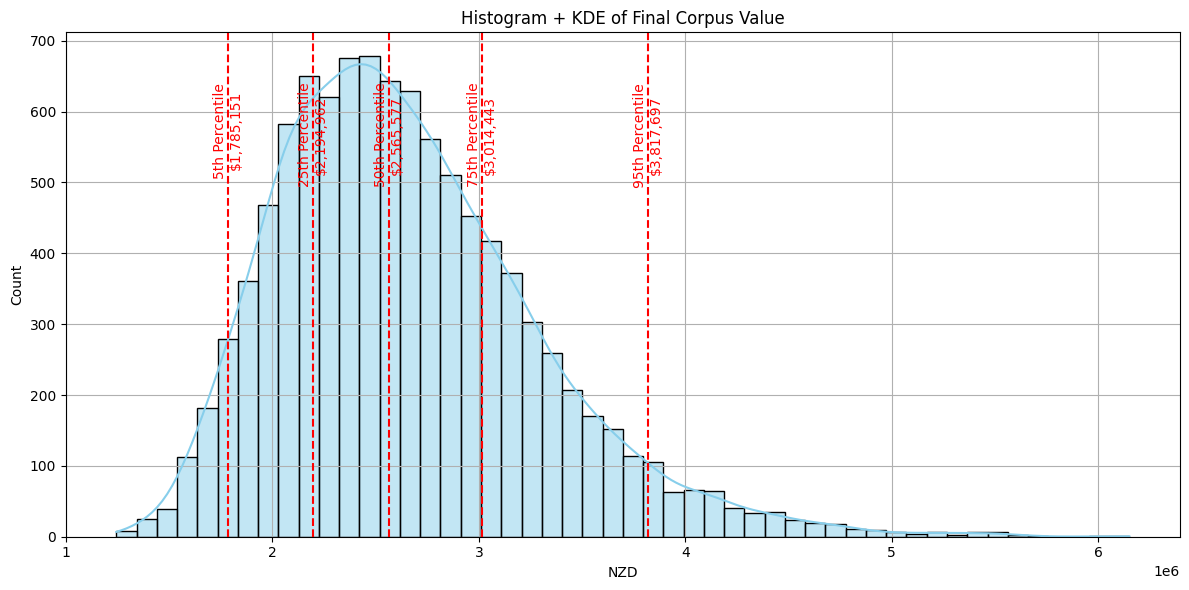

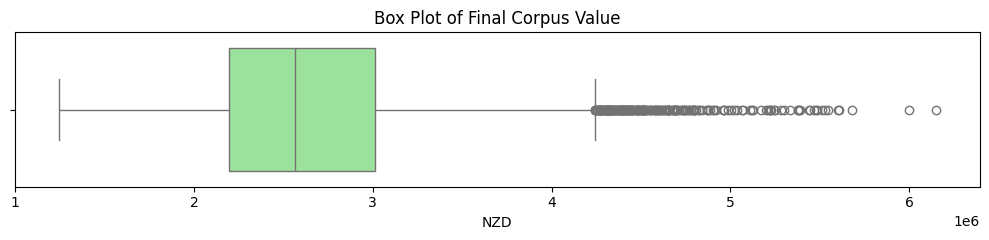

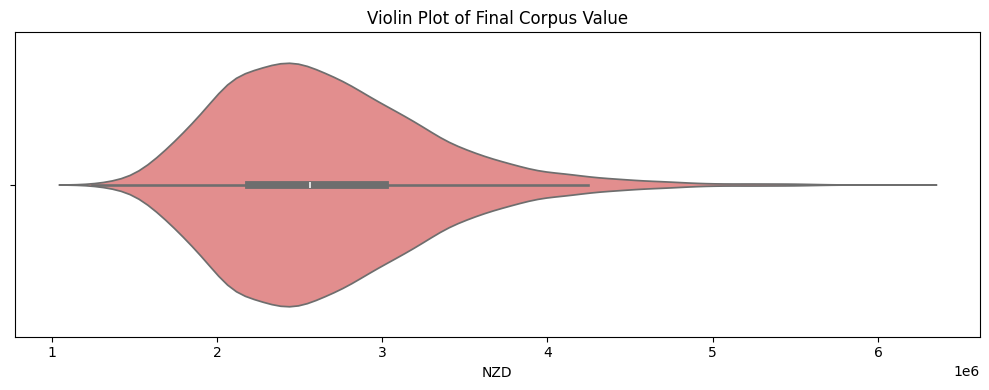


🔹 Post-Retirement Corpus (After 25 Years of 4% Withdrawals):
   5th Percentile  25th Percentile  50th Percentile  75th Percentile  \
0    1,467,566.57     1,841,165.63     2,172,521.45     2,596,538.60   

   95th Percentile  
0     3,351,729.09  


In [7]:


# --- PARAMETERS ---
initial_salary = 70000
hike_rate_mean = 0.05
hike_rate_std = 0.007
contribution_start = 0.06
contribution_increase_years = 3
contribution_increase_amount = 0.01
contribution_max = 0.20
lump_sum_amount = 10000
lump_sum_frequency = 5
start_lump_sum_year = 5
years = 35
simulations = 10000
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025

# --- NZ Tax Brackets ---
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# --- Asset Classes ---
growth_rates = {
    "Harboursafe": {"mean": 0.04, "std": 0.05},
    "Horizon": {"mean": 0.07, "std": 0.105},
    "SkyHigh": {"mean": 0.105, "std": 0.20},
    "Foreign_Equities": {"mean": 0.15, "std": np.sqrt(0.15**2 + 0.02**2)},
    "Bitcoin": {"mean": 0.15, "std": 0.60},
}

def get_allocation(year):
    if year <= 7:
        return {"Harboursafe": 0.05, "Horizon": 0.10, "SkyHigh": 0.65, "Foreign_Equities": 0.15, "Bitcoin": 0.05}
    elif year <= 10:
        return {"Harboursafe": 0.10, "Horizon": 0.15, "SkyHigh": 0.60, "Foreign_Equities": 0.15}
    elif year <= 15:
        return {"Harboursafe": 0.15, "Horizon": 0.20, "SkyHigh": 0.50, "Foreign_Equities": 0.15}
    elif year <= 20:
        return {"Harboursafe": 0.20, "Horizon": 0.25, "SkyHigh": 0.50, "Foreign_Equities": 0.05}
    elif year <= 25:
        return {"Harboursafe": 0.30, "Horizon": 0.30, "SkyHigh": 0.30, "Foreign_Equities": 0.10}
    elif year <= 30:
        return {"Harboursafe": 0.40, "Horizon": 0.35, "SkyHigh": 0.25}
    else:
        return {"Harboursafe": 0.60, "Horizon": 0.20, "SkyHigh": 0.20}

def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [
        (bracket[0] * ((1 + inflation_rate) ** (year - 1)),
         bracket[1] * ((1 + inflation_rate) ** (year - 1)), rate)
        for (bracket, rate) in zip(base_slabs, tax_rates)
    ]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# --- MONTE CARLO SIMULATION ---
final_values = []
for sim in range(simulations):
    salary = initial_salary
    corpus = 0
    for year in range(1, years + 1):
        tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
        acc = acc_levy * salary
        net_salary = salary - tax - acc

        contribution_rate = min(contribution_start + ((year - 1) // contribution_increase_years) * contribution_increase_amount, contribution_max)
        annual_contribution = net_salary * contribution_rate

        if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
            annual_contribution += lump_sum_amount

        allocation = get_allocation(year)
        yearly_growth = 0
        for asset, weight in allocation.items():
            if weight > 0:
                growth = np.random.normal(growth_rates[asset]["mean"], growth_rates[asset]["std"])
                if asset == "Foreign_Equities":
                    base_growth = np.random.normal(0.12, 0.15)
                    currency_appreciation = np.random.normal(0.03, 0.02)
                    growth = (1 + base_growth) * (1 + currency_appreciation) - 1
                yearly_growth += corpus * weight * growth + annual_contribution * weight * 0.5

        corpus += annual_contribution + yearly_growth
        salary *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))

    final_values.append(corpus)

# --- SUMMARY ---
final_array = np.array(final_values)
percentiles = [5, 25, 50, 75, 95]
summary_stats = {f"{p}th Percentile": np.percentile(final_array, p) for p in percentiles}
summary_df = pd.DataFrame([summary_stats])
print("\n🔹 Retirement Corpus Summary:")
print(summary_df.round(2))

# --- VISUALIZATION ---
plt.figure(figsize=(12, 6))
sns.histplot(final_array, bins=50, kde=True, color='skyblue', edgecolor='black')
for val, label in zip(summary_stats.values(), summary_stats.keys()):
    plt.axvline(x=val, color='red', linestyle='--')
    plt.text(val, plt.ylim()[1]*0.9, f"{label}\n${val:,.0f}", color='red', rotation=90, ha='center', va='top')
plt.title("Histogram + KDE of Final Corpus Value")
plt.xlabel("NZD")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2.5))
sns.boxplot(x=final_array, color='lightgreen')
plt.title("Box Plot of Final Corpus Value")
plt.xlabel("NZD")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.violinplot(x=final_array, color='lightcoral')
plt.title("Violin Plot of Final Corpus Value")
plt.xlabel("NZD")
plt.tight_layout()
plt.show()

# --- WITHDRAWAL PHASE ---
withdraw_years = 25
withdraw_rate = 0.04
withdraw_results = []

for val in final_values:
    corpus = val
    for _ in range(withdraw_years):
        withdrawal = corpus * withdraw_rate
        corpus -= withdrawal
        corpus *= (1 + np.random.normal(0.035, 0.02))  # Conservative post-retirement growth
    withdraw_results.append(corpus)

withdraw_array = np.array(withdraw_results)
withdraw_summary = {f"{p}th Percentile": np.percentile(withdraw_array, p) for p in percentiles}
withdraw_df = pd.DataFrame([withdraw_summary])
print("\n🔹 Post-Retirement Corpus (After 25 Years of 4% Withdrawals):")
print(withdraw_df.round(2))


🔍 Purpose of the Code
The Python code simulates Emily’s investment and salary growth over 35 years, incorporating:

Taxation rules (NZ tax brackets + ACC levy)

Salary hikes

Contributions to multiple investment funds (domestic and foreign)

Fund-specific annual returns with volatility

Foreign Investment Fund (FIF) tax when applicable

Dynamic asset allocation (aggressive → conservative)

Lump sum investments every 5 years

Detailed yearly tracking of all values

📊 What the Code Tracks (in the DataFrame)
Each year (from age 30 to 65), it calculates and stores:

Column Name	Description
Year, Age	Simulation year and Emily's age
Gross Salary	Emily’s gross annual salary that grows yearly
Salary Hike Value / %	The absolute and percentage increase in salary
Income Tax / ACC Levy	Taxes deducted based on NZ IRD brackets & ACC
Net Salary	Gross salary minus taxes and levy
Employee/Employer Contribution Rate %	Annual percentage of net salary contributed by Emily and employer
Employee/Employer Contribution	Dollar value of contributions
Total Contribution	Sum of employee + employer + (if applicable) lump sum
Lump Sum Added	One-time $10,000 contribution every 5 years
FIF Tax (NZD)	Tax applied to foreign investments > $50K
FIF Tax % of Foreign Value	Effective FIF tax as % of foreign corpus
Foreign Corpus	Accumulated value in foreign equities over time
Foreign Return Rate	Return % that year from foreign equities
Fund Contribution (per fund)	How much was allocated to each fund from contributions
Fund Return (per fund)	That year’s return from each fund (investment growth)
Adjusted Fund Value	Emily’s total corpus after all contributions, growth, and FIF tax

💡 Key Features Modeled:
✅ Tax with inflation adjustment

✅ Dynamic contribution rate increases

✅ Employer max 3% cap

✅ Lump sum every 5 years

✅ Stochastic growth rates (Monte Carlo-like sampling)

✅ FIF taxation rule only on foreign corpus > 50K

📦 Output
A Pandas DataFrame showing all the above, per year.

Final corpus projection at retirement (age 65), taking realistic and policy-aligned assumptions.

In [8]:
#Pre Retirement Code

# Parameters
initial_salary = 70000
hike_rate_mean = 0.05
hike_rate_std = 0.007
contribution_start = 0.06
contribution_increase_years = 3
contribution_increase_amount = 0.01
contribution_max = 0.15
lump_sum_amount = 10000
lump_sum_frequency = 5
start_lump_sum_year = 5
years = 35
start_age = 30
acc_levy = 0.0167
inflation_rate = 0.025
marginal_tax_rate = 0.30  # For FIF

# NZ tax brackets
nz_tax_brackets = [
    (0, 15600), (15601, 53500), (53501, 78100), (78101, 180000), (180001, float('inf'))
]
tax_rates = [0.105, 0.175, 0.30, 0.33, 0.39]

# Fund parameters
growth_rates = {
    "Harboursafe": {"mean": 0.0375, "std": 0.05},
    "Horizon": {"mean": 0.065, "std": 0.105},
    "SkyHigh": {"mean": 0.1025, "std": 0.2075},
    "Foreign_Equities": {"mean": 0.15, "std": np.sqrt(0.15**2 + 0.02**2)},
    "Bitcoin": {"mean": 0.20, "std": 0.60},
}

# Allocation strategy
# Updated dynamic allocation strategy with more aggressive early years
# and more conservative late-stage weights (horizontal format)

def get_allocation(year):
    if year <= 5: return {"Harboursafe": 0.05, "Horizon": 0.05, "SkyHigh": 0.45, "Foreign_Equities": 0.30, "Bitcoin": 0.15}
    elif year <= 10: return {"Harboursafe": 0.10, "Horizon": 0.10, "SkyHigh": 0.50, "Foreign_Equities": 0.20, "Bitcoin": 0.10}
    elif year <= 15: return {"Harboursafe": 0.20, "Horizon": 0.15, "SkyHigh": 0.45, "Foreign_Equities": 0.15, "Bitcoin": 0.05}
    elif year <= 20: return {"Harboursafe": 0.30, "Horizon": 0.20, "SkyHigh": 0.30, "Foreign_Equities": 0.15}
    elif year <= 25: return {"Harboursafe": 0.45, "Horizon": 0.25, "SkyHigh": 0.20, "Foreign_Equities": 0.10}
    elif year <= 30: return {"Harboursafe": 0.60, "Horizon": 0.25, "SkyHigh": 0.10, "Foreign_Equities": 0.05}
    else: return {"Harboursafe": 0.70, "Horizon": 0.20, "SkyHigh": 0.10}

# Tax calculation
def calculate_tax(salary, brackets, year, inflation=0.025):
    adjusted = [(b[0]*(1+inflation)**(year-1), b[1]*(1+inflation)**(year-1), r)
                for b, r in zip(brackets, tax_rates)]
    tax = 0
    for low, high, rate in adjusted:
        if salary > low:
            taxable = min(salary, high) - low
            tax += taxable * rate
        else:
            break
    return tax

# Simulation
records = []
salary = initial_salary
corpus = 0
prev_salary = None
foreign_corpus = 0

for year in range(1, years + 1):
    age = start_age + year - 1
    tax = calculate_tax(salary, nz_tax_brackets, year, inflation_rate)
    acc = acc_levy * salary
    net_salary = salary - tax - acc

    contrib_rate = min(contribution_start + ((year - 1) // contribution_increase_years) * contribution_increase_amount, contribution_max)
    emp_contrib = net_salary * contrib_rate
    employer_contrib = min(0.03, contrib_rate) * net_salary
    total_contrib = emp_contrib + employer_contrib

    lump_sum = 0
    if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
        lump_sum = lump_sum_amount
        total_contrib += lump_sum

    allocation = get_allocation(year)
    total_growth = 0
    fund_returns = {}
    fund_contributions = {}
    foreign_weight = allocation.get("Foreign_Equities", 0)
    foreign_contrib = total_contrib * foreign_weight

    # Foreign return calculation
    base_g = np.random.normal(0.12, 0.15)
    currency_g = np.random.normal(0.03, 0.02)
    foreign_return_rate = (1 + base_g) * (1 + currency_g) - 1
    foreign_return = foreign_corpus * foreign_return_rate
    foreign_corpus += foreign_contrib + foreign_return

    for fund, weight in allocation.items():
        g = np.random.normal(growth_rates[fund]["mean"], growth_rates[fund]["std"])
        if fund == "Foreign_Equities":
            g = foreign_return_rate
        contrib_val = total_contrib * weight
        fund_contributions[f"{fund} Contribution"] = round(contrib_val, 2)
        r = corpus * weight * g + contrib_val * 0.5
        total_growth += r
        fund_returns[f"{fund} Return"] = round(r, 2)

    fif_tax = foreign_corpus * 0.05 * marginal_tax_rate if foreign_corpus > 50000 else 0
    fif_tax_percent = (fif_tax / foreign_corpus * 100) if foreign_corpus > 0 else 0
    corpus = corpus + total_contrib + total_growth - fif_tax

    salary_change_value = salary - prev_salary if prev_salary is not None else 0
    salary_change_percent = (salary_change_value / prev_salary * 100) if prev_salary else 0
    prev_salary = salary

    records.append({
    "Year": year,
    "Age": age,

    # Salary & Deductions
    "Gross Salary": round(salary, 2),
    "Salary Hike Value": round(salary_change_value, 2),
    "Salary Hike %": round(salary_change_percent, 2),
    "Income Tax": round(tax, 2),
    "ACC Levy": round(acc, 2),
    "Net Salary": round(net_salary, 2),

    # Contributions
    "Employee Contribution Rate %": round(contrib_rate * 100, 2),
    "Employer Contribution Rate %": round(min(0.03, contrib_rate) * 100, 2),
    "Employee Contribution": round(emp_contrib, 2),
    "Employer Contribution": round(employer_contrib, 2),
    "Total Contribution": round(total_contrib, 2),
    "Lump Sum Added": round(lump_sum, 2),

    # Foreign Investment & Tax
    "Foreign Corpus": round(foreign_corpus, 2),
    "Foreign Return Rate": round(foreign_return_rate * 100, 2),
    "FIF Tax (NZD)": round(fif_tax, 2),
    "FIF Tax % of Foreign Value": round(fif_tax_percent, 2),

    # Fund-wise Contributions
    **fund_contributions,

    # Fund-wise Returns
    **fund_returns,

    # Final Portfolio Value
    "Adjusted Fund Value": round(corpus, 2)
})


    salary *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))

# Final DataFrame
df_detailed = pd.DataFrame(records)

# Display
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
print("🔹 Detailed Yearly Summary with FIF Tax Applied:")
display(df_detailed)


🔹 Detailed Yearly Summary with FIF Tax Applied:


,Year,Age,Gross Salary,Salary Hike Value,Salary Hike %,Income Tax,ACC Levy,Net Salary,Employee Contribution Rate %,Employer Contribution Rate %,...,Horizon Contribution,SkyHigh Contribution,Foreign_Equities Contribution,Bitcoin Contribution,Harboursafe Return,Horizon Return,SkyHigh Return,Foreign_Equities Return,Bitcoin Return,Adjusted Fund Value
0,1,30,"70,000.00",0.00,0.00,"13,220.03","1,169.00","55,610.97",6.00,3.00,...,250.25,"2,252.24","1,501.50",750.75,125.12,125.12,"1,126.12",750.75,375.37,"7,507.48"
1,2,31,"73,698.65","3,698.65",5.28,"14,135.12","1,230.77","58,332.76",6.00,3.00,...,262.50,"2,362.48","1,574.98",787.49,134.43,169.02,"1,087.80",505.68,354.49,"15,008.86"
2,3,32,"77,365.39","3,666.74",4.98,"15,035.78","1,292.00","61,037.61",6.00,3.00,...,274.67,"2,472.02","1,648.02",824.01,173.07,196.25,"3,886.60","1,400.20",-567.03,"25,591.33"
3,4,33,"81,179.50","3,814.11",4.93,"15,975.67","1,355.70","63,848.13",7.00,3.00,...,319.24,"2,873.17","1,915.44",957.72,287.02,290.50,"1,524.12","1,523.02","2,240.37","37,841.17"
4,5,34,"86,515.60","5,336.10",6.57,"17,375.91","1,444.81","67,694.88",7.00,3.00,...,338.47,"3,046.27","2,030.85","1,015.42",199.79,272.40,"2,169.60","1,668.77","7,350.41","56,271.63"
5,6,35,"91,270.52","4,754.92",5.50,"18,665.68","1,524.22","71,080.62",7.00,3.00,...,710.81,"3,554.03","1,421.61",710.81,-10.03,"1,489.82","4,056.29","3,192.24","4,538.75","76,646.77"
6,7,36,"96,052.19","4,781.66",5.24,"19,957.29","1,604.07","74,490.82",8.00,3.00,...,819.40,"4,097.00","1,638.80",819.40,"1,168.29",-814.65,"7,180.58","3,650.37",317.88,"96,343.23"
7,8,37,"101,447.66","5,395.47",5.62,"21,444.30","1,694.18","78,309.18",8.00,3.00,...,861.40,"4,307.01","1,722.80",861.40,"1,351.93","1,694.95","-6,294.00","3,191.91","5,955.32","110,857.34"
8,9,38,"106,280.57","4,832.91",4.76,"22,738.32","1,774.89","81,767.36",8.00,3.00,...,"1,899.44","9,497.20","3,798.88","1,899.44","1,767.19","1,413.84","21,701.02","8,952.37","3,538.13","167,224.31"
9,10,39,"110,928.27","4,647.70",4.37,"23,963.71","1,852.50","85,112.06",9.00,3.00,...,"1,021.34","5,106.72","2,042.69","1,021.34","1,064.78","3,098.75","13,048.62","-4,704.31","3,200.04","193,145.63"


Title:
Post-Retirement Withdrawal Strategy Simulation with Lifestyle Goals and NZ Superannuation Integration

Description:
This Python script models a post-retirement withdrawal plan for an individual (Emily) over a 25-year retirement horizon, beginning at age 65. It simulates corpus drawdown under realistic financial conditions including market returns, inflation, and lifestyle expectations.

Key features of the simulation:

Assumes a base lifestyle expense equivalent to $70,000 today, with a 40% improvement in retirement (i.e., ~$100,000 today’s dollars).

Lifestyle expenses are inflated to 2060 values based on 2.5% annual inflation.

Includes New Zealand Superannuation (NZ Super) support, adjusted to future value.

Calculates how much needs to be withdrawn from Emily’s personal retirement corpus after accounting for NZ Super.

Simulates portfolio growth annually using a normal distribution of expected returns (5% mean, 2% standard deviation).

Tracks critical financial metrics like:

Remaining corpus

Return rate

Growth

Withdrawal amount

Target lifestyle spending

Percent of corpus being withdrawn or targeted for spending

In [9]:
# --- POST-RETIREMENT WITHDRAWAL SIMULATION FUNCTION ---
def simulate_post_retirement(
    corpus,
    start_age,
    years,
    return_mean,
    return_std,
    inflation,
    lifestyle_base_today,
    lifestyle_improvement_pct,
    nz_super_annuity,
    accumulation_years
):
    data = []

    # Adjust lifestyle for improvement (e.g., 40% more than current)
    adjusted_lifestyle_today = lifestyle_base_today * (1 + lifestyle_improvement_pct)
    lifestyle_2060 = adjusted_lifestyle_today * ((1 + inflation) ** accumulation_years)

    # Adjust NZ Super to future nominal value
    nz_super_2060 = nz_super_annuity * ((1 + inflation) ** accumulation_years)

    # Simulate post-retirement drawdown
    for i in range(1, years + 1):
        year = accumulation_years + i
        age = start_age + year - 1

        # Lifestyle withdrawal adjusted for inflation annually
        desired_withdrawal = lifestyle_2060 * ((1 + inflation) ** (i - 1))
        govt_support = nz_super_2060 * ((1 + inflation) ** (i - 1))
        withdrawal = desired_withdrawal - govt_support  # net from corpus

        ret_rate = np.random.normal(return_mean, return_std)
        growth = corpus * ret_rate
        corpus = corpus + growth - withdrawal

        data.append({
            "Post-Retirement Year": year,
            "Age": age,
            "Target Lifestyle Spending": round(desired_withdrawal, 2),
            "Target Spending % of Corpus": round((desired_withdrawal / corpus) * 100, 2) if corpus > 0 else 0,
            "Govt Support (NZ Super)": round(govt_support, 2),
            "Withdrawal from Fund": round(withdrawal, 2),
            "Withdrawal % of Corpus": round((withdrawal / corpus) * 100, 2) if corpus > 0 else 0,
            "Annual Return Rate (%)": round(ret_rate * 100, 2),
            "Growth (NZD)": round(growth, 2),
            "Remaining Corpus": round(corpus, 2)
        })

    return pd.DataFrame(data)

# Example usage:
retirement_years = 25
inflation_rate = 0.025
lifestyle_base_today = 70000
lifestyle_improvement_pct = 0.40  # 40% improved lifestyle
return_mean = 0.05
return_std = 0.02
accumulation_years = 35
nz_super_annuity = 23000  # updated to reflect current approximate NZ Super for singles

df_post_retirement = simulate_post_retirement(
    corpus=corpus,
    start_age=start_age,
    years=retirement_years,
    return_mean=return_mean,
    return_std=return_std,
    inflation=inflation_rate,
    lifestyle_base_today=lifestyle_base_today,
    lifestyle_improvement_pct=lifestyle_improvement_pct,
    nz_super_annuity=nz_super_annuity,
    accumulation_years=accumulation_years
)

# Display the DataFrame
print("🔹 Post-Retirement Corpus Drawdown Summary:")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
display(df_post_retirement)


🔹 Post-Retirement Corpus Drawdown Summary:


,Post-Retirement Year,Age,Target Lifestyle Spending,Target Spending % of Corpus,Govt Support (NZ Super),Withdrawal from Fund,Withdrawal % of Corpus,Annual Return Rate (%),Growth (NZD),Remaining Corpus
0,36,65,"232,574.11",7.22,"54,583.72","177,990.39",5.52,3.27,"107,572.02","3,222,808.44"
1,37,66,"238,388.46",7.21,"55,948.31","182,440.15",5.52,8.28,"266,905.87","3,307,274.16"
2,38,67,"244,348.17",7.38,"57,347.02","187,001.15",5.65,5.79,"191,379.38","3,311,652.40"
3,39,68,"250,456.88",7.71,"58,780.70","191,676.18",5.90,3.82,"126,423.46","3,246,399.67"
4,40,69,"256,718.30",7.71,"60,250.21","196,468.09",5.90,8.57,"278,127.47","3,328,059.06"
5,41,70,"263,136.26",7.97,"61,756.47","201,379.79",6.10,5.30,"176,220.91","3,302,900.18"
6,42,71,"269,714.66",8.17,"63,300.38","206,414.28",6.25,6.23,"205,618.73","3,302,104.63"
7,43,72,"276,457.53",8.21,"64,882.89","211,574.64",6.28,8.42,"278,041.54","3,368,571.53"
8,44,73,"283,368.97",8.81,"66,504.96","216,864.01",6.74,1.95,"65,645.54","3,217,353.06"
9,45,74,"290,453.19",9.11,"68,167.59","222,285.61",6.97,6.04,"194,236.15","3,189,303.61"


In [10]:
#Streamlit for Visuals

st.set_page_config(page_title="Emily's Retirement Planner", layout="wide")

st.title("💼 Emily's Superannuation Fund & Retirement Planner")

with st.sidebar:
    st.header("Adjust Pre-Retirement Parameters")
    initial_salary = st.number_input("Initial Salary (NZD)", value=70000, step=1000)
    hike_rate_mean = st.slider("Salary Hike Rate (Mean)", 0.0, 0.1, 0.05, 0.005)
    hike_rate_std = st.slider("Salary Hike Std Dev", 0.0, 0.05, 0.007, 0.001)

    contribution_start = st.slider("Starting Contribution Rate", 0.0, 0.2, 0.06, 0.01)
    contribution_max = st.slider("Max Contribution Rate", 0.0, 0.3, 0.15, 0.01)

    lump_sum_amount = st.number_input("Lump Sum Amount (Every 5 Years)", value=10000, step=500)

    st.divider()
    st.header("Adjust Post-Retirement Parameters")
    lifestyle_base_today = st.number_input("Current Lifestyle Spending (NZD)", value=70000, step=1000)
    lifestyle_improvement_pct = st.slider("Lifestyle Improvement %", 0.0, 1.0, 0.4, 0.05)
    nz_super_annuity = st.number_input("NZ Superannuation Today (NZD)", value=23000, step=1000)
    return_mean = st.slider("Post-Retirement Return (Mean)", 0.0, 0.1, 0.05, 0.005)
    return_std = st.slider("Return Std Dev", 0.0, 0.1, 0.02, 0.005)

# Placeholders for outputs
st.subheader("🔍 Simulation Overview")
st.write("Your settings above define Emily's financial life from age 30 to 90.")
st.markdown("""
This dashboard is under development to include:
- 📈 Pre-retirement corpus growth
- 📉 Post-retirement drawdown
- 🧾 Year-wise breakdown of salary, contributions, returns, and withdrawals
- 💡 Insights: how long the corpus lasts, spending sustainability

👉 Run your existing notebook code with the same parameters, then visualize the output here.
""")

st.info("To enable full interactivity, integrate your simulation results (dataframes) below.")


NameError: name 'st' is not defined